In [1]:
# Problem of Model Generalization and Overtting

In [2]:
#  Undert Model. A model that fails to suciently learn the problem and performs
# poorly on a training dataset and does not perform well on a holdout sample.
#  Overt Model. A model that learns the training dataset too well, performing well on
# the training dataset but does not perform well on a hold out sample.
#  Good Fit Model. A model that suitably learns the training dataset and generalizes well
# to the hold out dataset.

In [3]:
# Penalize Large Weights with Weight Regularization

In [ ]:
 Calculate the sum of the absolute values of the weights, called the L1 norm (or L1).
 Calculate the sum of the squared values of the weights, called the L2 norm (or L2).
L1 encourages weights to 0.0 if possible, resulting in more sparse weights (weights with more
0.0 values). L2 oers more nuance, both penalizing larger weights more severely, but resulting
in less sparse weights. The use of L2 in linear and logistic regression is often referred to as
Ridge Regression. This is useful to know when trying to develop an intuition for the penalty or
examples of its usage.

In [ ]:
The alpha hyperparameter has a value between 0.0 (no penalty) and 1.0 (full penalty). 
This hyperparameter controls the amount of bias in the model from 0.0, or low bias (high variance),
to 1.0, or high bias (low variance).

In [5]:
import matplotlib.pyplot as pyplot
%matplotlib inline

[1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0]


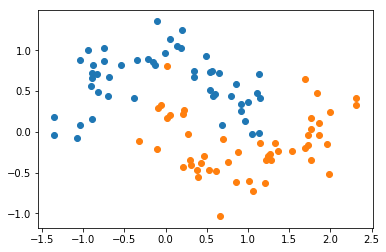

In [7]:
# scatter plot of moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from numpy import where
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
print(y)
# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    # show plot
pyplot.show()

Train: 1.000, Test: 0.943


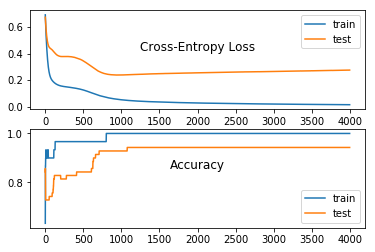

In [12]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from keras.regularizers import l2

# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# Weight Regularization Case Study 262
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
# model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train: 1.000, Test: 0.914


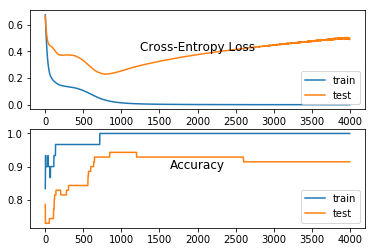

In [9]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# Weight Regularization Case Study 262
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
# model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
# MLP Model With Weight Regularization

Param: 0.100000, Train: 0.967, Test: 0.829
Param: 0.010000, Train: 1.000, Test: 0.943
Param: 0.001000, Train: 1.000, Test: 0.943
Param: 0.000100, Train: 1.000, Test: 0.929
Param: 0.000010, Train: 1.000, Test: 0.929
Param: 0.000001, Train: 1.000, Test: 0.914


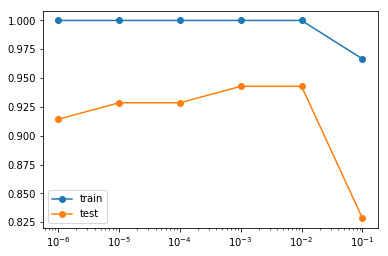

In [13]:
# grid search regularization values for moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
    # define model
    model = Sequential()
    model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=4000, verbose=0)
    # evaluate the model
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)

    # plot train and test means
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

In [14]:
# Sparse Representations with Activity Regularization

In [2]:
import matplotlib.pyplot as pyplot
%matplolib inline

UsageError: Line magic function `%matplolib` not found.


Train: 1.000, Test: 0.914


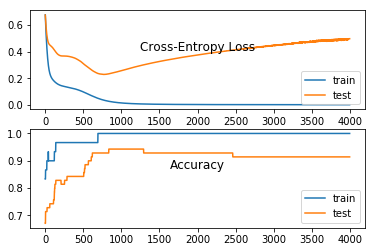

In [3]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [4]:
# Overfit MLP With Weight Constraint

Train: 1.000, Test: 0.943


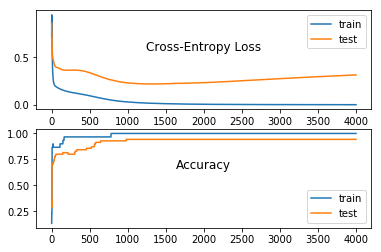

In [5]:
# mlp overfit on the moons dataset with a unit norm constraint
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.constraints import unit_norm
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_constraint=unit_norm()))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [6]:
# In this tutorial, you discovered the use of weight constraint regularization as an alternative to
# weight penalties to reduce overtting in deep neural networks. Specically, you learned:
#  Weight penalties encourage but do not require neural networks to have small weights.
#  Weight constraints such as the L2 norm and maximum norm can be used to force neural
# networks to have small weights during training.
#  Weight constraints can improve generalization when used in conjunction with other
# regularization methods, like dropout.
# 15.6.1 Next
# In the next tutorial, you will discover dropout regularization that can decouple the layers in
# your neural network model.

In [7]:
# Decouple Layers with Dropout

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train: 0.967, Test: 0.786


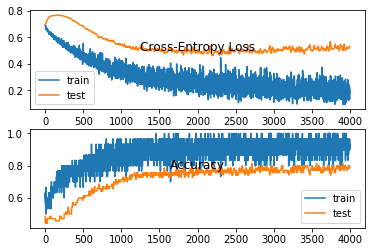

In [9]:
# mlp with dropout on the two circles dataset
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# Dropout Case Study 319
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [10]:
# Promote Robustness with Noise

In [11]:
# 17.2 Noise Regularization Keras API

Train: 1.000, Test: 0.786


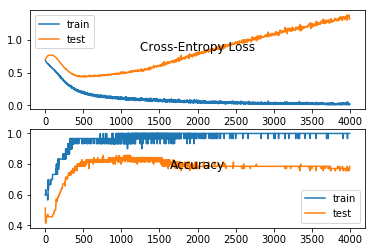

In [13]:
# MLP With Input Layer Noise
# mlp overfit on the two circles dataset with input noise
# Noise Regularization Case Study
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(GaussianNoise(0.01, input_shape=(2,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train: 0.933, Test: 0.814


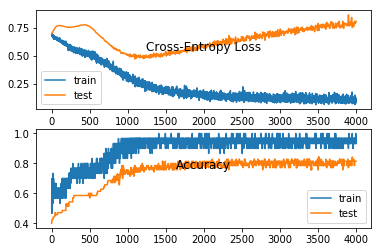

In [14]:
# MLP With Hidden Layer Noise
# mlp overfit on the two circles dataset with hidden layer noise
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import GaussianNoise
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(GaussianNoise(0.1))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Train: 1.000, Test: 0.771


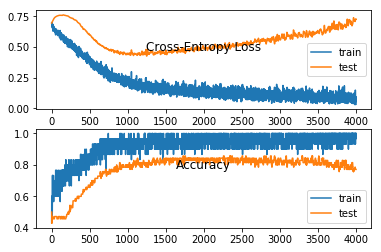

In [15]:
# mlp overfit on the two circles dataset with hidden layer noise (alternate)
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise
from matplotlib import pyplot
# Noise Regularization Case Study 340
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(GaussianNoise(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# In this tutorial, you discovered that adding noise to a neural network during training can
# improve the robustness of the network resulting in better generalization and faster learning.
# Specically, you learned:
#  Small datasets can make learning challenging for neural nets and the examples can be
# memorized.
#  Adding noise during training can make the training process more robust and reduce
# generalization error.
#  Noise is traditionally added to the inputs, but can also be added to weights, gradients,
# and even activation functions.

In [ ]:
# Next In the next tutorial, you will discover how to halt model training at the right time with early stopping.

In [ ]:
# Halt Training at the Right Time with Early Stopping

Train: 1.000, Test: 0.914


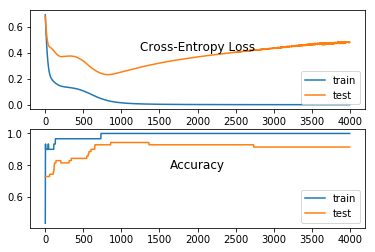

In [16]:
### Early Stopping 
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Epoch 00213: early stopping
Train: 0.967, Test: 0.814


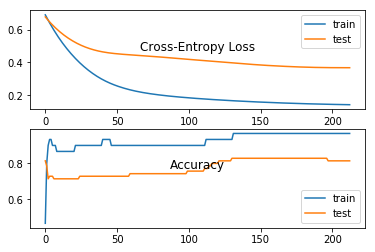

In [17]:
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0,
callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

Epoch 01067: early stopping
Train: 1.000, Test: 0.943


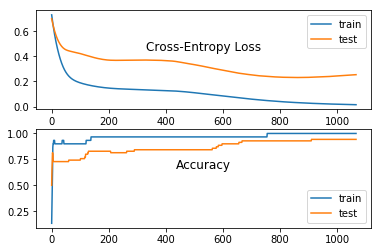

In [18]:
# mlp overfit on the moons dataset with patient early stopping
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
# generate 2d classification dataset
# 18.3. Early Stopping Case Study 361
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0,
callbacks=[es])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1,
save_best_only=True)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0,
callbacks=[es, mc])
# load the saved model
saved_model = load_model('best_model.h5')
# evaluate the model
_, train_acc = saved_model.evaluate(trainX, trainy, verbose=0)
_, test_acc = saved_model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


Epoch 00001: val_acc improved from -inf to 0.64286, saving model to best_model.h5

Epoch 00002: val_acc improved from 0.64286 to 0.78571, saving model to best_model.h5

Epoch 00003: val_acc improved from 0.78571 to 0.84286, saving model to best_model.h5

Epoch 00004: val_acc did not improve from 0.84286

Epoch 00005: val_acc did not improve from 0.84286

Epoch 00006: val_acc did not improve from 0.84286

Epoch 00007: val_acc did not improve from 0.84286

Epoch 00008: val_acc did not improve from 0.84286

Epoch 00009: val_acc did not improve from 0.84286

Epoch 00010: val_acc did not improve from 0.84286

Epoch 00011: val_acc did not improve from 0.84286

Epoch 00012: val_acc did not improve from 0.84286

Epoch 00013: val_acc did not improve from 0.84286

Epoch 00014: val_acc did not improve from 0.84286

Epoch 00015: val_acc did not improve from 0.84286

Epoch 00016: val_acc did not improve from 0.84286

Epoch 00017: val_acc did not improve from 0.84286

Epoch 00018: val_acc did not i


Epoch 00192: val_acc did not improve from 0.84286

Epoch 00193: val_acc did not improve from 0.84286

Epoch 00194: val_acc did not improve from 0.84286

Epoch 00195: val_acc did not improve from 0.84286

Epoch 00196: val_acc did not improve from 0.84286

Epoch 00197: val_acc did not improve from 0.84286

Epoch 00198: val_acc did not improve from 0.84286

Epoch 00199: val_acc did not improve from 0.84286

Epoch 00200: val_acc did not improve from 0.84286

Epoch 00201: val_acc did not improve from 0.84286

Epoch 00202: val_acc did not improve from 0.84286

Epoch 00203: val_acc did not improve from 0.84286

Epoch 00204: val_acc did not improve from 0.84286

Epoch 00205: val_acc did not improve from 0.84286

Epoch 00206: val_acc did not improve from 0.84286

Epoch 00207: val_acc did not improve from 0.84286

Epoch 00208: val_acc did not improve from 0.84286

Epoch 00209: val_acc did not improve from 0.84286

Epoch 00210: val_acc did not improve from 0.84286

Epoch 00211: val_acc did not i


Epoch 00393: val_acc did not improve from 0.84286

Epoch 00394: val_acc did not improve from 0.84286

Epoch 00395: val_acc did not improve from 0.84286

Epoch 00396: val_acc did not improve from 0.84286

Epoch 00397: val_acc did not improve from 0.84286

Epoch 00398: val_acc did not improve from 0.84286

Epoch 00399: val_acc did not improve from 0.84286

Epoch 00400: val_acc did not improve from 0.84286

Epoch 00401: val_acc did not improve from 0.84286

Epoch 00402: val_acc did not improve from 0.84286

Epoch 00403: val_acc did not improve from 0.84286

Epoch 00404: val_acc did not improve from 0.84286

Epoch 00405: val_acc did not improve from 0.84286

Epoch 00406: val_acc did not improve from 0.84286

Epoch 00407: val_acc did not improve from 0.84286

Epoch 00408: val_acc did not improve from 0.84286

Epoch 00409: val_acc did not improve from 0.84286

Epoch 00410: val_acc did not improve from 0.84286

Epoch 00411: val_acc did not improve from 0.84286

Epoch 00412: val_acc did not i


Epoch 00589: val_acc did not improve from 0.88571

Epoch 00590: val_acc did not improve from 0.88571

Epoch 00591: val_acc did not improve from 0.88571

Epoch 00592: val_acc did not improve from 0.88571

Epoch 00593: val_acc did not improve from 0.88571

Epoch 00594: val_acc did not improve from 0.88571

Epoch 00595: val_acc did not improve from 0.88571

Epoch 00596: val_acc did not improve from 0.88571

Epoch 00597: val_acc did not improve from 0.88571

Epoch 00598: val_acc did not improve from 0.88571

Epoch 00599: val_acc did not improve from 0.88571

Epoch 00600: val_acc did not improve from 0.88571

Epoch 00601: val_acc did not improve from 0.88571

Epoch 00602: val_acc did not improve from 0.88571

Epoch 00603: val_acc did not improve from 0.88571

Epoch 00604: val_acc did not improve from 0.88571

Epoch 00605: val_acc did not improve from 0.88571

Epoch 00606: val_acc did not improve from 0.88571

Epoch 00607: val_acc did not improve from 0.88571

Epoch 00608: val_acc did not i


Epoch 00785: val_acc did not improve from 0.92857

Epoch 00786: val_acc did not improve from 0.92857

Epoch 00787: val_acc did not improve from 0.92857

Epoch 00788: val_acc did not improve from 0.92857

Epoch 00789: val_acc did not improve from 0.92857

Epoch 00790: val_acc did not improve from 0.92857

Epoch 00791: val_acc did not improve from 0.92857

Epoch 00792: val_acc did not improve from 0.92857

Epoch 00793: val_acc did not improve from 0.92857

Epoch 00794: val_acc did not improve from 0.92857

Epoch 00795: val_acc did not improve from 0.92857

Epoch 00796: val_acc did not improve from 0.92857

Epoch 00797: val_acc did not improve from 0.92857

Epoch 00798: val_acc did not improve from 0.92857

Epoch 00799: val_acc did not improve from 0.92857

Epoch 00800: val_acc did not improve from 0.92857

Epoch 00801: val_acc did not improve from 0.92857

Epoch 00802: val_acc did not improve from 0.92857

Epoch 00803: val_acc did not improve from 0.92857

Epoch 00804: val_acc did not i


Epoch 00948: val_acc did not improve from 0.94286

Epoch 00949: val_acc did not improve from 0.94286

Epoch 00950: val_acc did not improve from 0.94286

Epoch 00951: val_acc did not improve from 0.94286

Epoch 00952: val_acc did not improve from 0.94286

Epoch 00953: val_acc did not improve from 0.94286

Epoch 00954: val_acc did not improve from 0.94286

Epoch 00955: val_acc did not improve from 0.94286

Epoch 00956: val_acc did not improve from 0.94286

Epoch 00957: val_acc did not improve from 0.94286

Epoch 00958: val_acc did not improve from 0.94286

Epoch 00959: val_acc did not improve from 0.94286

Epoch 00960: val_acc did not improve from 0.94286

Epoch 00961: val_acc did not improve from 0.94286

Epoch 00962: val_acc did not improve from 0.94286

Epoch 00963: val_acc did not improve from 0.94286

Epoch 00964: val_acc did not improve from 0.94286

Epoch 00965: val_acc did not improve from 0.94286

Epoch 00966: val_acc did not improve from 0.94286

Epoch 00967: val_acc did not i

In [20]:
# Summary
# In this tutorial, you discovered that stopping the training of neural network early before it has
# overt the training dataset can reduce overtting and improve the generalization of deep neural
# networks. Specically, you learned:
#  The challenge of training a neural network long enough to learn the mapping, but not so
# long that it overts the training data.
#  Model performance on a holdout validation dataset can be monitored during training and
# training stopped when generalization error starts to increase.
#  The use of early stopping requires the selection of a performance measure to monitor, a
# trigger for stopping training, and a selection of the model weights to use